In [3]:
import pandas as pd
import numpy as np

patients = pd.read_csv('../data/indian_liver_patient.csv')
patients

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [7]:
from sklearn.preprocessing import LabelEncoder

new_columns = ['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Dataset', 'Albumin_and_Globulin_Ratio']
new_patients = patients.drop([c for c in patients.columns if c not in new_columns], axis=1)
new_patients.dropna(inplace=True)
new_patients = new_patients.apply(LabelEncoder().fit_transform)
new_patients

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Albumin_and_Globulin_Ratio,Dataset
0,58,0,3,0,31,0
1,55,1,69,45,23,0
2,55,1,56,36,30,0
3,52,1,6,3,37,0
4,64,1,35,19,4,0
...,...,...,...,...,...,...
578,53,1,1,0,2,1
579,34,1,2,0,42,0
580,46,1,4,1,37,0
581,25,1,9,4,37,0


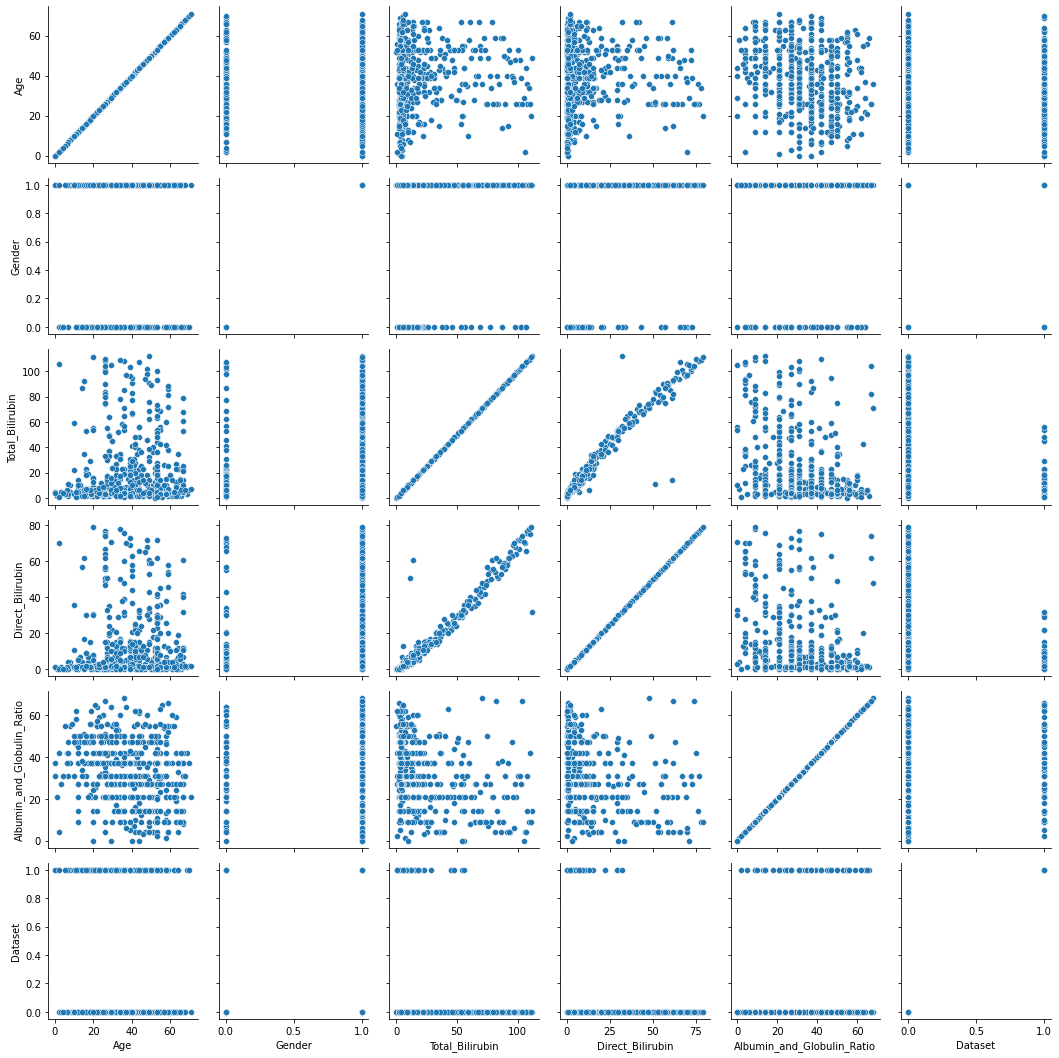

In [8]:
import seaborn as sns
g = sns.PairGrid(new_patients)
g.map(sns.scatterplot)

/Users/linhtran/mambaforge/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 34.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/linhtran/mambaforge/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 45.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Dataset', ylabel='Total_Bilirubin'>

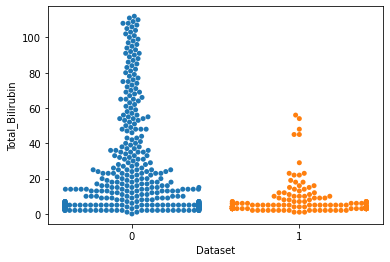

In [9]:
sns.swarmplot(x="Dataset", y="Total_Bilirubin", data=new_patients)

<AxesSubplot:xlabel='Dataset', ylabel='Total_Bilirubin'>

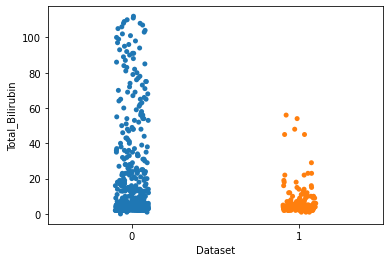

In [10]:
sns.stripplot(x="Dataset", y="Total_Bilirubin", data=new_patients)

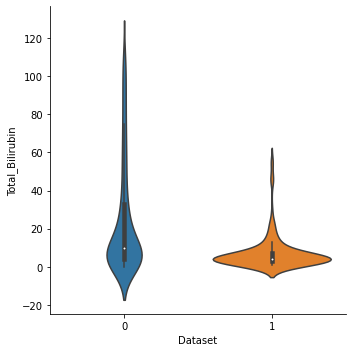

In [13]:
sns.catplot(x="Dataset", y="Total_Bilirubin", kind="violin", data=new_patients)


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression

In [15]:
Selected_features = ['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin', 'Albumin_and_Globulin_Ratio']

X = new_patients[Selected_features]
y = new_patients['Dataset']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
model = LogisticRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

print(classification_report(y_test, predictions))
print('Predicted labels: ', predictions)
print('Accuracy: ', accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.71      0.96      0.82        82
           1       0.40      0.06      0.10        34

    accuracy                           0.70       116
   macro avg       0.56      0.51      0.46       116
weighted avg       0.62      0.70      0.61       116

Predicted labels:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]
Accuracy:  0.6982758620689655


In [17]:
confusion_matrix(y_test, predictions)

array([[79,  3],
       [32,  2]])

/Users/linhtran/mambaforge/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/linhtran/mambaforge/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

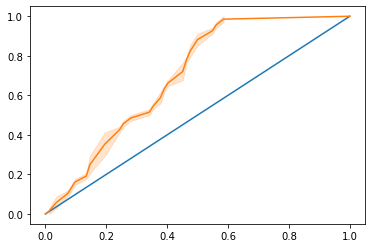

In [18]:
y_scores = model.predict_proba(X_test)
# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
sns.lineplot([0,1], [0,1])
sns.lineplot(fpr, tpr)

In [19]:
auc = roc_auc_score(y_test, y_scores[:,1])
auc

0.7005021520803443